In [1]:
# !pip install vanna

In [2]:
from vanna.ollama import Ollama
from vanna.chromadb import ChromaDB_VectorStore

In [4]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

vn = MyVanna(config={'model': 'llama3'})

In [7]:
"""
vn.connect_to_mysql(host='', dbname='', user='', password='', port=)

"""


In [8]:
# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan

# If you like the plan, then uncomment this and run it to train
vn.train(plan=plan)

SQL Prompt: [{'role': 'system', 'content': "You are a SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nThe following columns are in the Album table in the def database:\n\n|    | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME   | COLUMN_NAME   | DATA_TYPE   | COLUMN_COMMENT   |\n|---:|:----------------|:---------------|:-------------|:--------------|:------------|:-----------------|\n|  0 | def             | Chinook        | Album        | AlbumId       | int         |                  |\n|  1 | def             | Chinook        | Album        | Title         | varchar     |                  |\n|  2 | def             | Chinook        | Album        | ArtistId      | int         |                  |\n\nThe following columns are in the Track table in the def database:\n\n|    | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME   

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


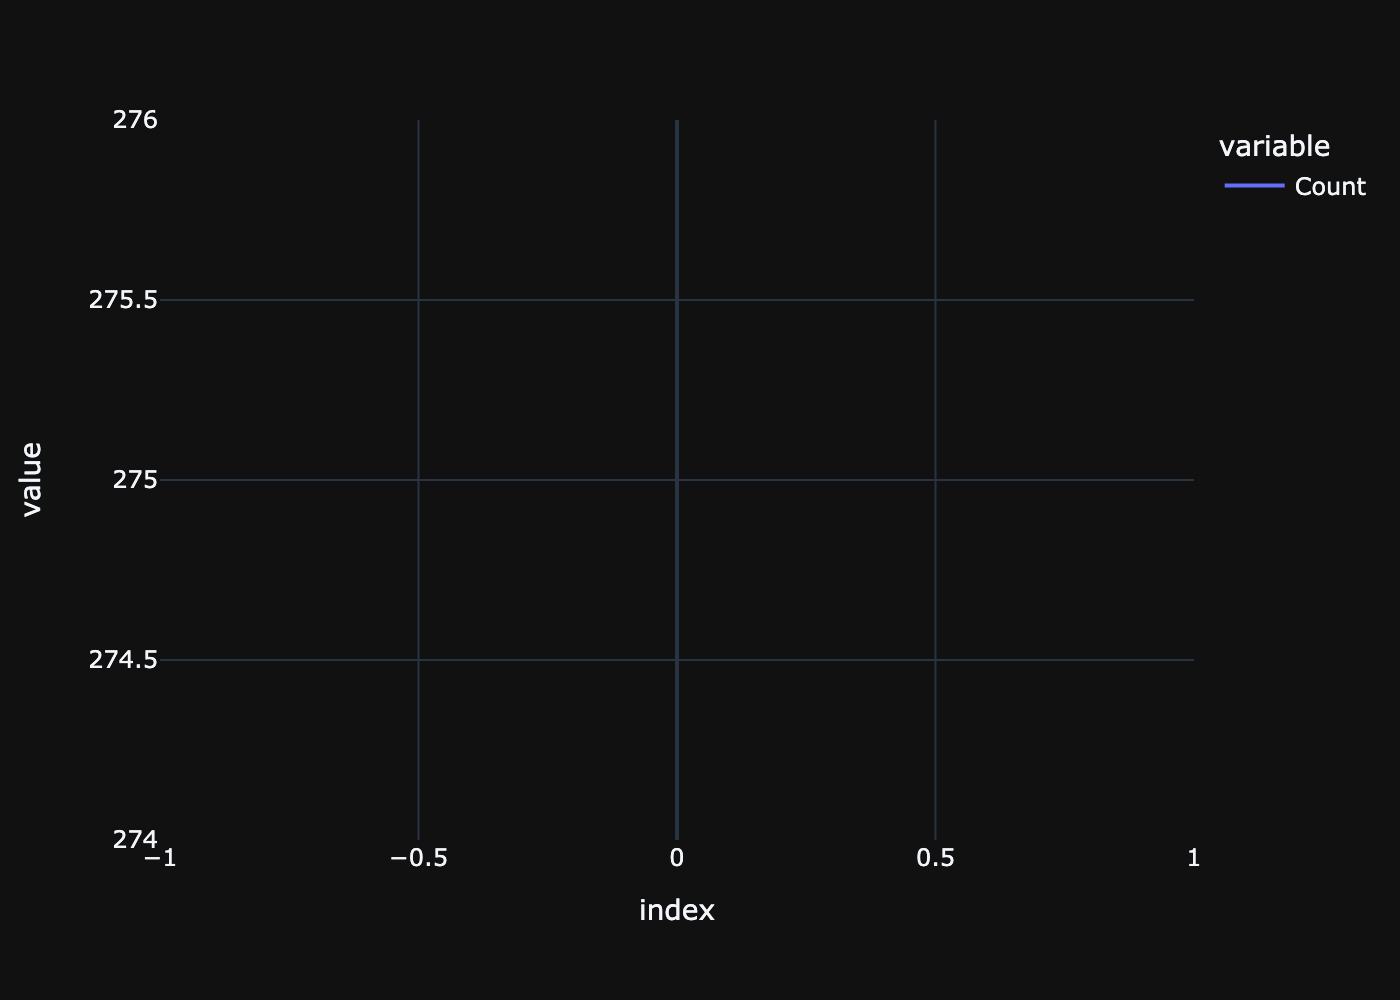

In [9]:
vanna_ans = vn.ask(question="how many artists are present?")

In [10]:
vanna_ans

('SELECT COUNT(DISTINCT ArtistId) AS Count\nFROM Chinook.Artist',
    Count
 0    275,
 Figure({
     'data': [{'hovertemplate': 'variable=Count<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'Count',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': 'Count',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([0]),
               'xaxis': 'x',
               'y': array([275]),
               'yaxis': 'y'}],
     'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
 }))

In [11]:
vanna_ans[1]

,Count
0,275


In [12]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn, allow_llm_to_see_data=True)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
